In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv', low_memory=False)

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
# Neighbourhood group 'brookln' instead of 'Brooklyn'
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [8]:
df = df.drop_duplicates()


In [9]:
df = df.drop(columns=["house_rules", "license"], errors="ignore")


In [11]:
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False)


In [12]:
df['price'] = df['price'].str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].str.replace(',', '', regex=False)


In [13]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')


In [14]:
df = df.dropna()


In [15]:
# Example: Convert year to integer
if 'construction_year' in df.columns:
    df['construction_year'] = df['construction_year'].astype(int, errors='ignore')


In [17]:
df['neighbourhood group'] = df['neighbourhood group'].replace({'brookln': 'Brooklyn'})


/tmp/ipython-input-2631777900.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
df = df[df['availability 365'] <= 365]


In [20]:
df.duplicated().value_counts()

,count
False,81263


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81263 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              81263 non-null  int64  
 1   NAME                            81263 non-null  object 
 2   host id                         81263 non-null  int64  
 3   host_identity_verified          81263 non-null  object 
 4   host name                       81263 non-null  object 
 5   neighbourhood group             81263 non-null  object 
 6   neighbourhood                   81263 non-null  object 
 7   lat                             81263 non-null  float64
 8   long                            81263 non-null  float64
 9   country                         81263 non-null  object 
 10  country code                    81263 non-null  object 
 11  instant_bookable                81263 non-null  object 
 12  cancellation_policy             8126

In [22]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,8.126300e+04,8.126300e+04,81263.000000,81263.000000,81263.000000,81263.000000,81263.000000,81263.000000,81263.000000,81263.000000,81263.000000,81263.000000,81263.000000
mean,3.004764e+07,4.917566e+10,40.727260,-73.948261,2012.490666,626.626177,125.326274,7.417349,32.025190,1.391148,3.286391,7.106543,135.031847
std,1.598033e+07,2.853999e+10,0.056389,0.050630,5.761114,331.747348,66.352801,28.362955,51.669175,1.761232,1.278644,29.850375,128.453532
min,1.001254e+06,1.236005e+08,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.632407e+07,2.444400e+10,40.687620,-73.982060,2008.000000,341.000000,68.000000,2.000000,3.000000,0.230000,2.000000,1.000000,5.000000
50%,3.119392e+07,4.902225e+10,40.721240,-73.953590,2012.000000,626.000000,125.000000,3.000000,11.000000,0.760000,3.000000,1.000000,92.000000
75%,4.346465e+07,7.383704e+10,40.762490,-73.930490,2017.000000,915.000000,183.000000,5.000000,38.000000,2.030000,4.000000,2.000000,253.000000
max,5.735803e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,365.000000


In [26]:
property_types = df['room type'].value_counts().to_frame()
property_types


,count
room type,
Entire home/apt,42932
Private room,36609
Shared room,1614
Hotel room,108


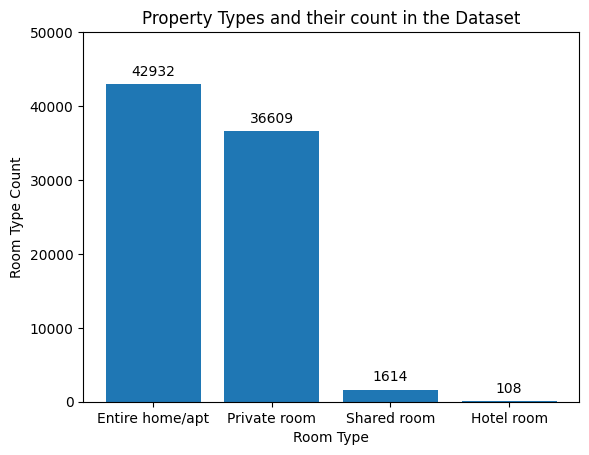

In [35]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');

In [37]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,33722
Manhattan,33547
Queens,10948
Bronx,2241
Staten Island,805


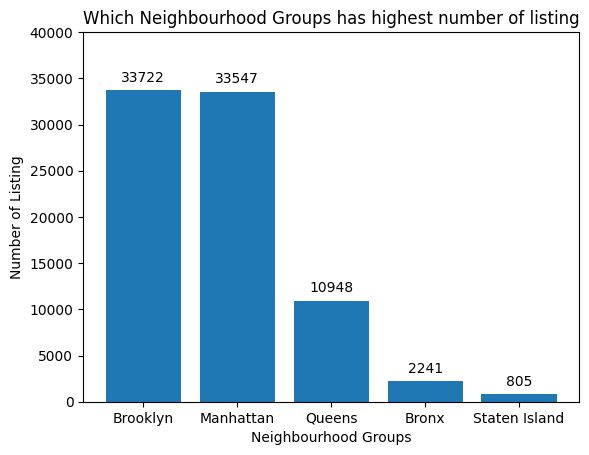

In [38]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, "count"], padding = 4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Number of Listing');
plt.title('Which Neighbourhood Groups has highest number of listing');

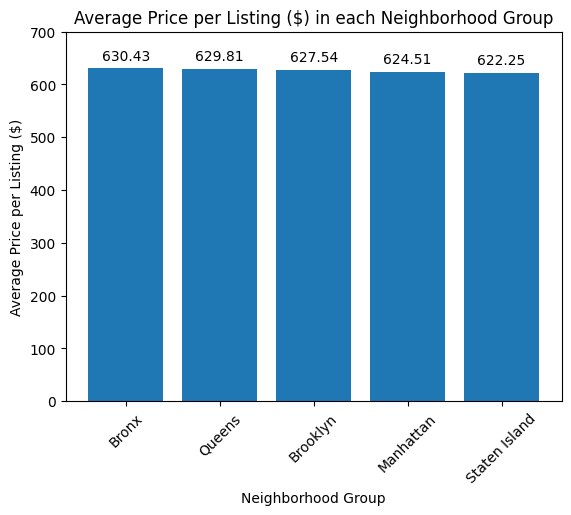

In [43]:

# Calculate average price by neighbourhood group
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False).to_frame()

# Plot bar chart
avg_price_bar = plt.bar(avg_price.index, avg_price['price'])
plt.bar_label(avg_price_bar, labels=round(avg_price['price'], 2), label_type='edge', padding=4)

plt.ylim([0, 700])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.xticks(rotation=45)
plt.title('Average Price per Listing ($) in each Neighborhood Group')
plt.show()


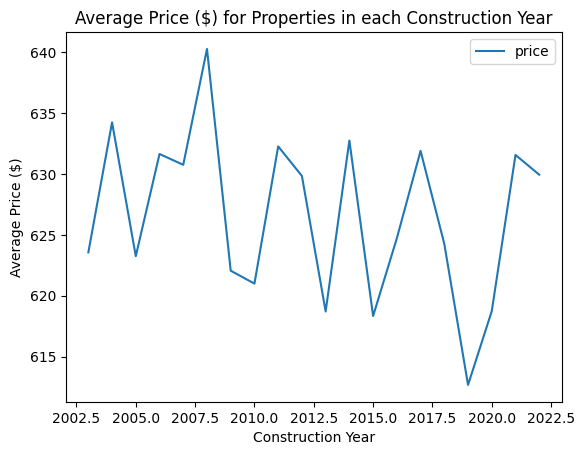

In [44]:
#Is there a relationship between the construction year of property and price?
df.groupby (df['Construction year']) ['price'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

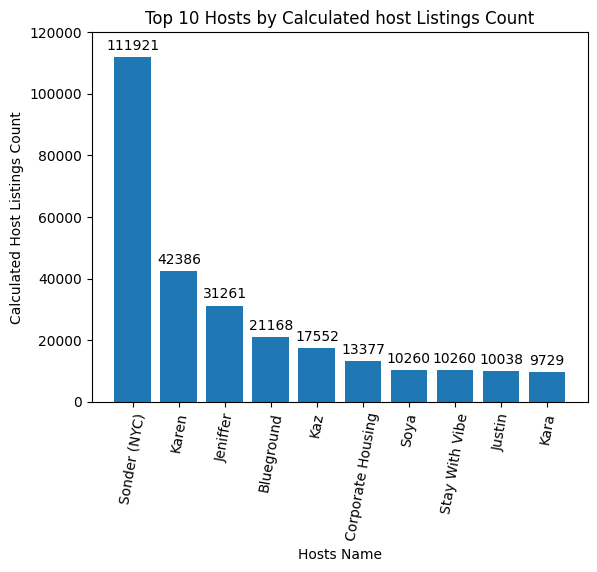

In [47]:
#who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label (hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated host Listings Count');

In [50]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review


,review rate number
host_identity_verified,
verified,3.289849
unconfirmed,3.282933


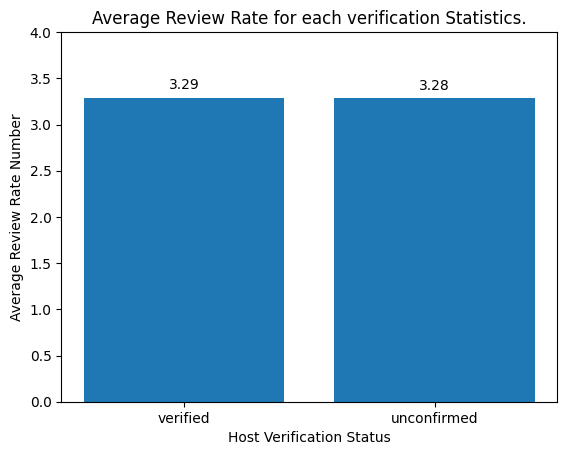

In [51]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each verification Statistics.');

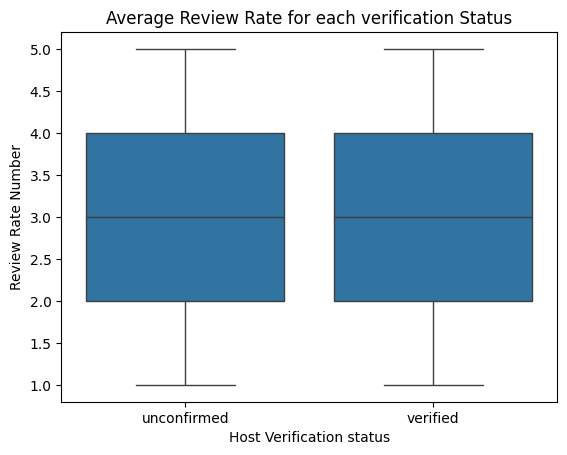

In [52]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host Verification status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each verification Status');

In [54]:
#Is there a correlation between the price of a listing and its service fee?
df['price'].corr(df['service fee'])

np.float64(0.9999908997036285)

Text(0.5, 1.0, 'A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee')

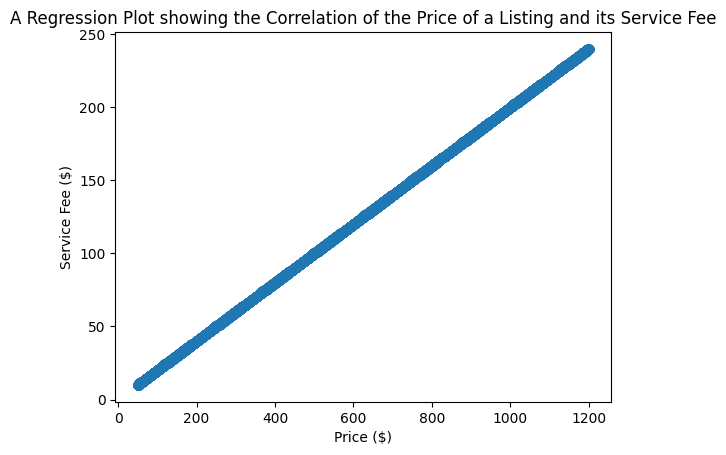

In [55]:
sns.regplot(df, x= 'price', y ='service fee');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee')

In [56]:
#What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN =df.groupby(['neighbourhood group', 'room type']) ['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.378190
                    Private room               3.315789
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.251608
                    Hotel room                 3.833333
                    Private room               3.283526
                    Shared room                3.327759
Manhattan           Entire home/apt            3.274865
                    Hotel room                 3.500000
                    Private room               3.293528
                    Shared room                3.269350
Queens              Entire home/apt            3.358646
                    Hotel room                 3.750000
                    Private room               3.317546
                    Shared room                3.326087
Staten Island       Entire home/apt            3.326877
                    Private room               3.490909
                    Shared room                3.714286

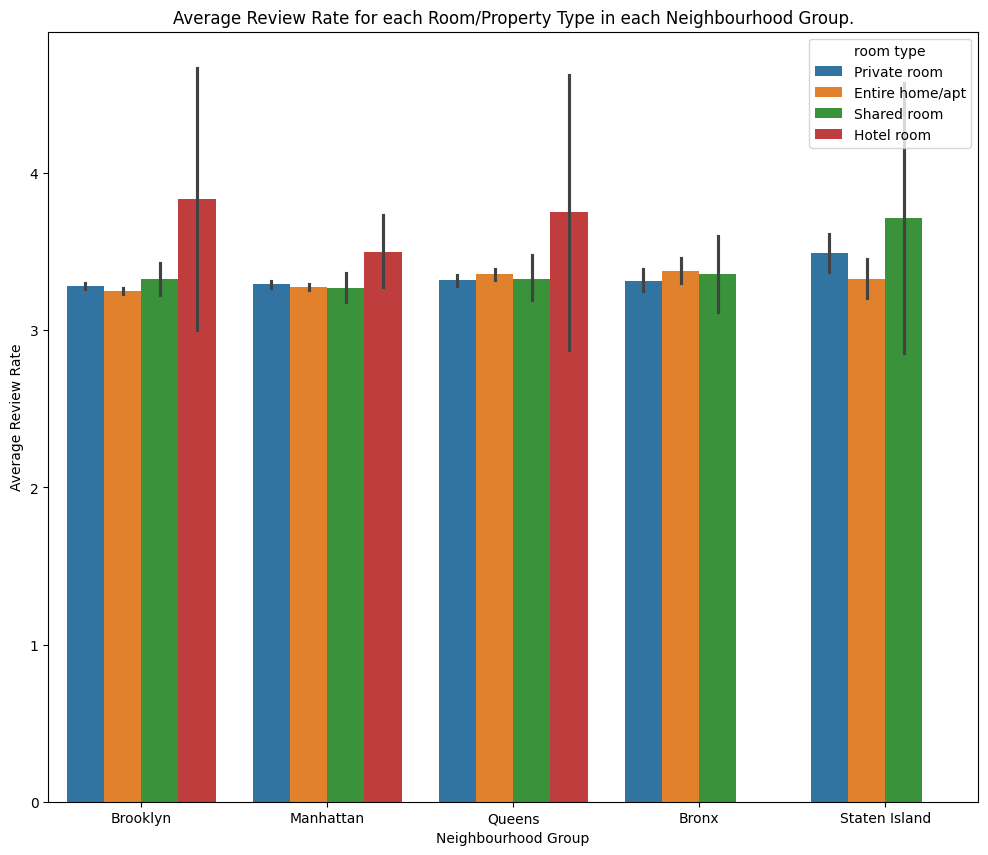

In [57]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

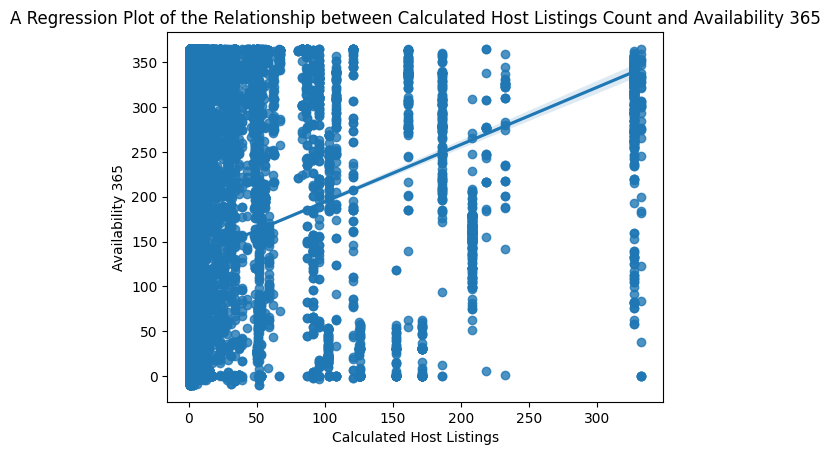

In [58]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [60]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.14856264998419236)